In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imsave
import seaborn as sns
import itertools
import cPickle as pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
base_dir = '/media/michael/Engage/data/audio/alison_data/golden_set/'
save_dir = '/home/michael/Dropbox/engage/FairbrassFirmanetal_/data/predictions/pr_curves/'

In [60]:
def plot_pr(classname, runs):
    palette = itertools.cycle(sns.color_palette())

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111)
    ax.tick_params(axis='both', which='major', labelsize=18)

    m = {'biotic': 'biotic', 'anthrop': 'anthropogenic'}
    mapper = {'warblr_challenge_baseline': 'bulbul', 
         'oneSec_BI_baseline': 'BI',
         #'overlap_NDSI_baseline': u'$NDSI_{%s}$' % classname,
              'oneSec_NDSI_baseline': 'NDSI (%s)' % m[classname],
         'oneSec_ACI_baseline': 'ACI',
              'oneSec_ADI_baseline': 'ADI',
             'ensemble_train': 'CityBioNet',
             'ensemble_train_2': 'CityAnthroNet'}
        
    for run_type in runs:
        loaddir = base_dir + 'predictions/%s/%s/analysis/' % (run_type, classname)
        with open(loaddir + 'pr_results.pkl') as f:
            prec, recall, thresholds, prec_at_05, recall_at_05 = pickle.load(f)

        col = next(palette)
        if run_type in mapper:
            ax.plot(recall, prec, color=col, label=mapper[run_type])
        else:
            ax.plot(recall, prec, color=col, label=run_type)
        ax.plot(recall_at_05, prec_at_05, 'o', ms=8, color=col)


    box = ax.get_position()
    ax.set_position([box.x0 - 0.025, box.y0 - 0.025, box.width * 1.05, box.height * 1.05])

    plt.xlim(0, 1)
    plt.ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    plt.ylabel('Precision', fontsize=18)
    plt.xlabel('Recall', fontsize=18)
    
    if classname == 'anthrop':
        legend = ax.legend(loc='center', fontsize=18, frameon=True)
    else:
        legend = ax.legend(loc='lower center', fontsize=18, frameon=True)
        
    legend.get_frame().set_facecolor('#FFFFFF')
    legend.get_frame().set

    sns.set_style("whitegrid")

    plt.savefig(save_dir + '/pr_%s.png' % classname, dpi=200)
    plt.savefig(save_dir + '/pr_%s.pdf' % classname)

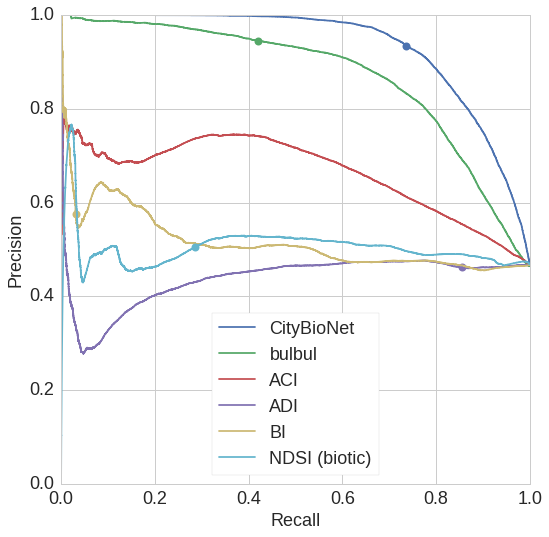

In [61]:
biotic_runs = [
    'ensemble_train',
#     'single_net/0',
#     'single_net_test2/0',
    #'mel32_large_test_golden_fullsplit',
               'warblr_challenge_baseline', 
#         'overlap_ACI_noRound_baseline', 
#         'overlap_ACI_Round_baseline',
#        'timestep_ACI_noRound_baseline', 
        'oneSec_ACI_baseline',
    'oneSec_ADI_baseline',
#        'timestep_BI_baseline',
       'oneSec_BI_baseline',
         
       'oneSec_NDSI_baseline']
#, 'aci_baseline']


plot_pr('biotic', biotic_runs)
#plt.plot([0, 1], [0.95, 0.95])

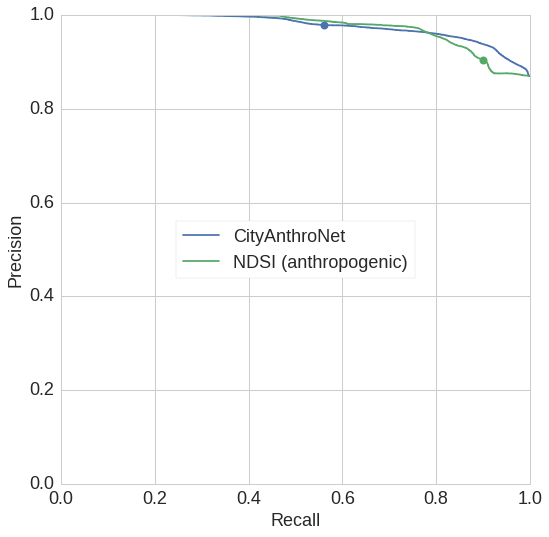

In [62]:
anthrop_runs = [
    'ensemble_train_2',
    'oneSec_NDSI_baseline']

plot_pr('anthrop', anthrop_runs)

In [25]:
im = imread('/home/michael/Desktop/untitled.png')
(im[250, 250:, 1] > 128).mean()

0.876